# **<center> Solution Manual For Tutors </center>**

# <center><strong>Important:</strong> Make a Copy of this Google Colab Notebook!
</center>

<p>Please refrain from using or modifying this current Google Colab notebook directly. Instead, follow these instructions to create your own copy:</p>

<ol>
  <li>Go to the "File" menu at the top of the Colab interface.</li>
  <li>Select "Save a copy in Drive" to create a duplicate of this notebook.</li>
  <li>You can now work on your own copy without affecting the original.</li>
</ol>

<p>This ensures that you have a personalized version to work on and make changes according to your needs. Remember to save your progress as you go. Enjoy working on your own copy of the Google Colab notebook!</p>

# **Principal Component Analysis for Dimensionality Reduction**
In this module you will apply your knowledge gained from the past couple of modules to implement PCA using Python. The goals is to write the algorithm by yourself from scratch using Python. Next, you will utilize your PCA function to analyse the principal compenents of a real life data set. <p>

This practice is divided into 4 Parts, with the last being optional. <p>

<ul><li> Part 1: Step-by-Step Guide for Coding Principal Component Analysis </li>
<li> Part 2: Write Your Own PCA Function </li>
<li> Part 3: Apply your PCA Function on the IRIS datset </li>
<li> [OPTIONAL] Part 4: Apply your PCA Function on Your Own Dataset </li> </ul>

<i>Note: Depending on your previous experience with Python and familiarity with PCA, Parts 1-3 may feel relatively straightforward. As a result, we have included an optional Part 4 to provide an additional challenge. If you are new to these concepts or prefer to focus on Parts 1-3, feel free to skip Part 4. </i> <p>

## **Getting Started**

Run the provided code sections and follow the instructions. Implement your own code were indicated.

## **Importing Python Packages**
The first step is to import your necessary Python packages. For this example, we'll be using numpy to implement prinicpal component analysis.

In [ ]:
import numpy as np # Importing the numpy library as np - this is a common practice for Python coding
import matplotlib.pyplot as plt # Importing the matplotlib.pyplot as plt - useful for visualizing data


## **Generate a Dummy Dataset**

Before applying your algorithm to a dataset, we will generate dummy data to get you started. Generating dummy data is common practice in Machine Learning classes and can be very useful for analyizing or building algorithms to analyze data. <p>
We will also show you how to visualize the data and investigate the shape of the data. These are all helpful tool that help you to get a better understanding of the data you are working with.

In [ ]:
# Generate data points
np.random.seed(10) # pseudo-random number generation, we will get the same set of random numbers every time
X = np.random.randint(10, 50, 100).reshape(20, 5)  # Randomly generate a 20x5 matrix of integers between 10 and 50

# Check the size of the data
data_shape = X.shape
print("Size of the data:", data_shape)

Size of the data: (20, 5)


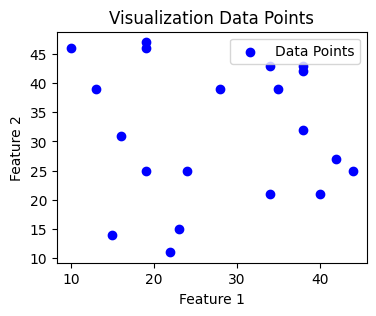

In [ ]:
# Plotting the data
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization Data Points')
plt.legend()
plt.show()

The data generated from the previous code snippet has a shape of (20, 5), meaning it consists of 20 examples with 5 variables for each example. To normalize the data, we computed the mean value for each variable and then subtracted that mean from every value in the respective column.

## **Part 1: Step-by-Step Guide for Coding Principal Component Analysis**
In this section, we will guide you through the implementation steps of Principal Component Analysis (PCA). We highly recommend that you try to complete the code by yourself, utilizing the NumPy package. It will be beneficial to explore the [documentation](https://numpy.org/doc/) and familiarize yourself with the available functions within NumPy. We encourage you to refrain from relying on external sources on the internet for this exercise. By attempting the implementation independently, you can strengthen your understanding of PCA and enhance your problem-solving skills. Let's begin the journey!

<ul><li> <strong>NumPy Basics</strong>: <a href="url"> https://numpy.org/doc/stable/user/absolute_beginners.html </a>
<li> <strong>NumPy User Guide</strong>: <a href="url"> https://numpy.org/doc/1.23/numpy-user.pdf </a></ul>


### **Standardizing the Data**
PCA requires the data to be standardized (mean = 0, variance =1). <p>

Here are some articles on why this is important:
<ul><li> <strong>Scikit Learn</strong>: <a href="url"> https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html</a>
<li> <strong>Blog Post</strong>: <a href="url"> https://builtin.com/data-science/when-and-why-standardize-your-data </a></ul>

<i>Feel free to compare your PCA results with and without standardized data. </i>


Mean:  [27.55 31.55 27.2  31.95 28.1 ] Variance:  [10.4760441  11.33787899  7.72398861 10.34637618  6.55667599]
Mean:  [-6.66133815e-17 -5.55111512e-17  9.71445147e-17  9.43689571e-17
 -2.33146835e-16] Variance:  [1. 1. 1. 1. 1.]


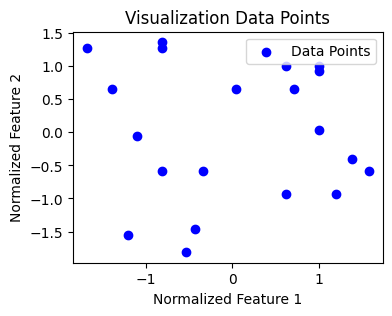

In [ ]:
# Normalize data  (mean = 0, variance = 1)
print('Mean: ', np.mean(X, axis=0),'Variance: ', np.std(X, axis=0))

X_centered = X - np.mean(X , axis = 0)
X_norm = X_centered/np.std(X_centered, axis=0)

print('Mean: ', np.mean(X_norm, axis=0), 'Variance: ', np.std(X_norm, axis=0))

# Visualize the mean centered data
plt.figure(figsize=(4, 3))
plt.scatter(X_norm[:, 0], X_norm[:, 1], c='blue', label='Data Points')
plt.xlabel('Normalized Feature 1')
plt.ylabel('Normalized Feature 2')
plt.title('Visualization Data Points')
plt.legend()
plt.show()


<p> We provided you with the code for mean centering the data, to get you started. Now, you need to fill in code by yourself. </p>

<p><i> Note, there are many different ways of how to implement the different steps. However, each step should not require you to write more than 1 to 4 lines. </i> </p>


In [ ]:
# Calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_norm, rowvar = False)

# Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

# Sorting Eigenvalues and Eigenvectors
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

# Calculate explained variance
explained_variance_1 = sorted_eigenvalue / np.sum(sorted_eigenvalue)

# Select a subset of principal components
n_components = 2 # you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

# Transform the data
X_reduced_1 = np.dot(eigenvector_subset.transpose() , X_norm.transpose() ).transpose()

# Print explained variance ratios
for i, exp_var in enumerate(explained_variance_1[:n_components]):
    print(f"Explained Variance for PC{i+1}: {exp_var*100:.2f}%")

# Check the size of the data
print("\nSize of the original data: %s\nSize of the dimensionality reduced data: %s" % (X.shape, X_reduced_1.shape))

Explained Variance for PC1: 28.16%
Explained Variance for PC2: 23.75%

Size of the original data: (20, 5)
Size of the dimensionality reduced data: (20, 2)


## **Part 2: Write Your Own PCA Function**
Now we will combine all steps into a function. A function allows you to break down your program into smaller, modular units, making your code more organized and readable. Functions take input values, process them, and optionally return results. They promote code reusability, allowing you to use the same function multiple times in different parts of your program. Functions enhance code readability by abstracting complex logic into simpler, self-contained units. They also facilitate code maintenance, as changes or updates can be made in one place, reflecting across all function calls. <p>

Fill in the blanks using the code snippets from Part 1.

In [ ]:
def PCA_custom(X, nComponents):

  # normalize data
  X_centered = X - np.mean(X , axis = 0)
  X_norm = X_centered/np.std(X_centered, axis=0)

  # Calculating the covariance matrix of the mean-centered data.
  cov_mat = np.cov(X_norm, rowvar = False)

  # Calculating Eigenvalues and Eigenvectors of the covariance matrix
  eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

  # Sorting Eigenvalues and Eigenvectors
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]

  # Calculate explained variance
  explained_variance = sorted_eigenvalue / np.sum(sorted_eigenvalue)

  # Select a subset of principal components
  eigenvector_subset = sorted_eigenvectors[:,0:nComponents]

  # Transform the data
  X_reduced = np.dot(eigenvector_subset.transpose() , X_norm.transpose() ).transpose()

  return X_reduced, explained_variance

Let's compare the results from Part 1 and Part 2. Make sure both results are the same before moving on.

In [ ]:
# Result Part 1
# Print explained variance ratios
for i, exp_var in enumerate(explained_variance_1[:n_components]):
    print(f"Explained Variance for PC{i+1}: {exp_var*100:.2f}%")

# Check the size of the data
print("\nSize of the original data: %s\nSize of the dimensionality reduced data: %s" % (X.shape, X_reduced_1.shape))

# result Part 2
[X_reduced_2, explained_variance_2] = PCA_custom(X,2)

# Print explained variance ratios
for i, exp_var in enumerate(explained_variance_2[:n_components]):
    print(f"Explained Variance for PC{i+1}: {exp_var*100:.2f}%")

# Check the size of the data
print("\nSize of the original data: %s\nSize of the dimensionality reduced data: %s" % (X.shape, X_reduced_2.shape))

Explained Variance for PC1: 28.16%
Explained Variance for PC2: 23.75%

Size of the original data: (20, 5)
Size of the dimensionality reduced data: (20, 2)
Explained Variance for PC1: 28.16%
Explained Variance for PC2: 23.75%

Size of the original data: (20, 5)
Size of the dimensionality reduced data: (20, 2)


Well done, let's call the function we just created to perform PCA on a real life data set in Part 3.




## **Part 3: Apply your PCA Function on the [IRIS datset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)**

The IRIS dataset consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray <p>

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.<p>

The below plot uses the first two features. See here for more information on this dataset.<p>

<i>Source: The description of the datatset is copied from the [scikit-learn webpage](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). </i><p>


<Axes: xlabel='sepal length', ylabel='sepal width'>

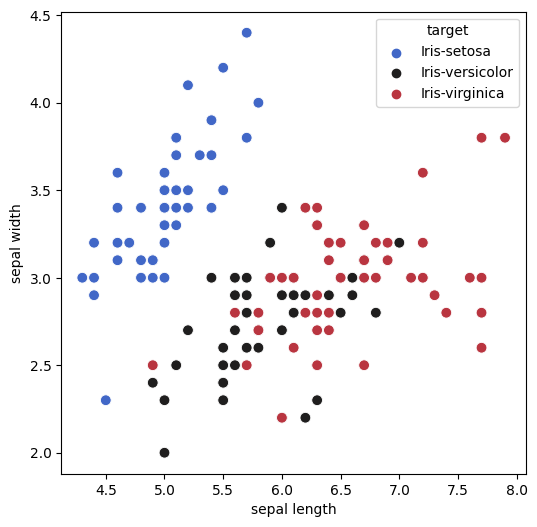

In [ ]:
import pandas as pd # libary for data management
import seaborn as sb # library for visualization
import matplotlib.pyplot as plt # library plotting

# Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

# Set the figure size for the plot
plt.figure(figsize=(6, 6))

# Create a scatter plot using seaborn
# - Set the data to data (original dataset)
# - Set the x-axis to 'sepal length' and y-axis to 'sepal width'
# - Use the 'target' variable for coloring different groups
# - Set the marker size to 60
# - Use the 'icefire' color palette for coloring
sb.scatterplot(data=data, x='sepal length', y='sepal width', hue='target', s=60, palette='icefire')


Now, we prepare the data and apply our own PCA functions.

In [ ]:
# Prepare the data
x = data.iloc[:, 0:4]  # Select the features (sepal length, sepal width, petal length, petal width)

# Prepare the target
target = data.iloc[:, 4]  # Select the target variable (iris species)

# Applying Principal Component Analysis (PCA) to reduce the dimensionality to 2 components
[mat_reduced, exp_variance] = PCA_custom(x, 2)  # Your custom function, note: test out different numbers of principal components

# Creating a Pandas DataFrame of the reduced dataset
principal_df = pd.DataFrame(mat_reduced, columns=['PC1', 'PC2'])  # Create a DataFrame with the reduced components

# Concatenate the reduced components with the target variable to create a complete dataset
principal_df = pd.concat([principal_df, pd.DataFrame(target)], axis=1)  # Concatenate the reduced components and target variable

# Print explained variance ratios
for i, exp_var in enumerate(exp_variance[:2]):
    print(f"Explained Variance for PC{i+1}: {exp_var*100:.2f}%")

Explained Variance for PC1: 72.77%
Explained Variance for PC2: 23.03%


Let's visualize the results. <p>
<strong>Task:</strong> Compare the original data with the dimension reduced data.

Size of the original data: (150, 4)
Size of the dimensionality reduced data: (150, 2)


Text(0, 0.5, 'PC2: 23.03%')

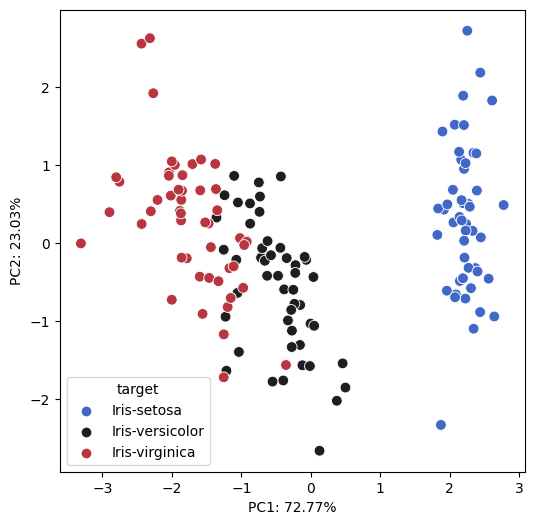

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

# Check the size of the data
print("Size of the original data: %s\nSize of the dimensionality reduced data: %s" % (x.shape, mat_reduced.shape))

# Set the figure size for the plot
plt.figure(figsize=(6, 6))

# Create a scatter plot using seaborn
# - Set the data to principal_df
# - Set the x-axis to 'PC1' and y-axis to 'PC2'
# - Use the 'target' variable for coloring different groups
# - Set the marker size to 60
# - Use the 'icefire' color palette for coloring
sb.scatterplot(data=principal_df, x='PC1', y='PC2', hue='target', s=60, palette='icefire')

plt.xlabel(f'PC1: {exp_variance[0]*100:.2f}%')
plt.ylabel(f'PC2: {exp_variance[1]*100:.2f}%')

## [Optional] Plot Dimensionality Reduced Data using 3 Prinicipal Components

In [ ]:
# Applying Principal Component Analysis (PCA) to reduce the dimensionality to 3 components
[mat_reduced, exp_variance] = PCA_custom(x, 3)  # Your custom function

# Creating a Pandas DataFrame of the reduced dataset
principal_df = pd.DataFrame(mat_reduced, columns=['PC1', 'PC2', 'PC3'])  # Create a DataFrame with the reduced components

# Concatenate the reduced components with the target variable to create a complete dataset
principal_df = pd.concat([principal_df, pd.DataFrame(target)], axis=1)  # Concatenate the reduced components and target variable

# Check the size of the data
print("Size of the original data: %s\nSize of the dimensionality reduced data: %s" % (x.shape, mat_reduced.shape))


Size of the original data: (150, 4)
Size of the dimensionality reduced data: (150, 3)


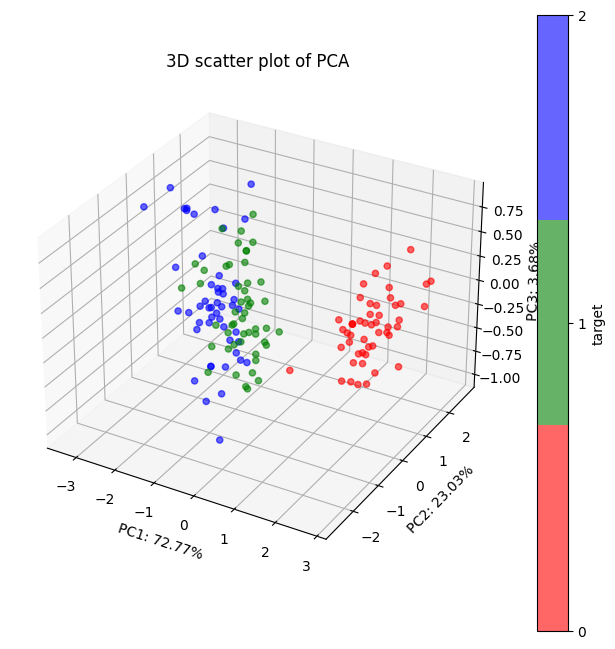

In [ ]:
from sklearn.preprocessing import LabelEncoder # to transform categorical labels to numerical labels for plotting
from matplotlib import colors as mcolors # for coloring

le = LabelEncoder()
target_numerical = le.fit_transform(target)

principal_df['target_numerical'] = target_numerical #Add this new numerical target to your DataFrame.


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Creating a colormap
my_cmap = mcolors.ListedColormap(['red', 'green', 'blue'])

# Plotting the scatter plot
sctt = ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'],
                  alpha=0.6,
                  c=principal_df['target_numerical'],  # Color by target_numerical
                  cmap=my_cmap,
                  marker='o')

plt.title('3D scatter plot of PCA')

ax.set_xlabel(f'PC1: {exp_variance[0]*100:.2f}%')
ax.set_ylabel(f'PC2: {exp_variance[1]*100:.2f}%')
ax.set_zlabel(f'PC3: {exp_variance[2]*100:.2f}%')


# Add a color bar which maps values to colors.
fig.colorbar(sctt, ax = ax, ticks = range(len(le.classes_)), label = 'target')

plt.show()


## Explanation of the plot

After running the provided code, which applies Principal Component Analysis (PCA) to reduce the dimensionality of the original dataset, you will have a new DataFrame principal_df that contains the reduced components along with the target variable. Here's how you can interpret the data:

<ul> <li>
Reduced Dimensionality: The dimensionality of the data has been reduced from the original dataset's four features (sepal length, sepal width, petal length, petal width) to two principal components (PC1 and PC2). The principal components represent linear combinations of the original features.

<li><strong>Variance Explained</strong>: The principal components are ordered by the amount of variance they explain. PC1 captures the most significant amount of variance, followed by PC2. The cumulative variance explained by the selected principal components can be assessed to understand how much information is retained from the original dataset.

<li><strong>Scatter Plot</strong>: Visualize the reduced data using a scatter plot. Plot PC1 on the x-axis and PC2 on the y-axis. Each data point represents an instance from the original dataset. The scatter plot allows you to examine the distribution, grouping, and patterns of the data points in the reduced space.

<li><strong>Data Separation</strong>: Observe if the data points in the scatter plot are well-separated or show distinct clusters. A clear separation or grouping of data points may indicate that the selected principal components effectively capture the variations and differences between the classes or categories of the target variable.

By interpreting the reduced data, you can gain insights into the structure, patterns, and separability of the original dataset in the lower-dimensional space defined by the selected principal components.

Source: The step by step guide, the PCA function coded from scratch using Python and NumPy, as well as the application of the PCA function of the IRIS dataset is based on [this](https://www.askpython.com/python/examples/principal-component-analysis) guide.

You made it, well done! You just learned how to write your own function from scratch to implement PCA on a real-life dataset. The next part is optional.

## **[OPTIONAL] Part 4: Apply your PCA Function on Your Own Dataset**

Now it's time to apply what you have learned to your own dataset. Python offers a variety of open-source datasets that you can utilize, and we recommend leveraging one of those. However, you are also free to use other open-source datasets or data you have access to. Please note that while tutors may not be able to assist you with the specific dataset you choose, they can still guide you through the implementation process.<p>

<strong>Task</strong>: Start by visualizing the data from your chosen dataset. Then, implement PCA using your own function. Experiment with different choices for the number of principal components to use for dimensionality reduction. Justify your selection of the number of principal components and observe how it impacts your results. Finally, visualize your results.

### Finding your own dataset
Use the built-in datasets offered by scikit-learn to develop your own question to analyze using support vector machines. Follow the code below to learn how to import these datasets and display descriptive information to choose your favorite dataset. Use this time to get creative!

In [ ]:
from sklearn import datasets

# List the available datasets:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [ ]:
# Output a discription of the dataset
print(datasets.load_digits().DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## **Apply PCA on your Dataset**
Let's start by loading your dataset and visualizing the data before performing dimensionality reduction. You can follow the steps provided in Part 3 of the instructions. However, keep in mind that there are various ways to visualize data, so feel free to explore different techniques and choose the approach that best suits your needs. This flexibility allows you to showcase the characteristics and patterns of your dataset effectively. Once you have visualized the data, you will gain insights into its structure and distribution, which will serve as a reference for comparison after dimensionality reduction.

In [ ]:
# Visualization of the data set

############ Insert you rown code here ############

Perform PCA on your own data set using your own PCA function.

In [ ]:
# Data Prperation

############ Insert you rown code here ############

# PCA

############ Insert you rown code here ############

Visualize your dimensionality reduced data. Compare your results to the initial dataset.

In [ ]:
# Visualization of the dimensionality reduced data

############ Insert you rown code here ############

You are an absolute Pro - well done!